# (1) 형태소 분석기와 단어 미등록 문제
텍스트의 분포를 이용해서 토큰화를 수행하는 비지도 학습 토크나이저에 대해서 알아보기

## 형태소 분석기의 필요성
* 한국어는 교착어
* 교착어란 하나의 낱말(엄밀히는 하나의 어절)이 하나의 어근(root,어간(stem))과 각각 단일한 기능을 가지는 하나 이상의 접사(affix)의 결합된 언어
* 조사라는 품사는 교착어에만 존재한다.
* 영어처럼 띄어쓰기 단위 토큰화가 제대로 동작하지 않는다.

In [2]:
# 영어 토큰화 복습
en_text = "The dog ran back to the corner near the spare bedrooms"
print(en_text.split())

['The', 'dog', 'ran', 'back', 'to', 'the', 'corner', 'near', 'the', 'spare', 'bedrooms']


In [3]:
# 한국어 문장 띄어쓰기 토큰화
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사 왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사', '왔어']


* '사과'란 단어가 총 4번 등장했는데 모두 '의', '를', '가', '랑' 등이 붙어있어 이를 제거해주지 않으면 기계는 전부 다른 단어로 인식하게 된다.
* 이를 해결하기 위해서 한국어는 주로 형태소 분석기를 사용
*  형태소 분석기 중 하나인 Okt를 사용해서 형태소 분석을 하는 예제

In [4]:
# Okt를 사용
from konlpy.tag import Okt

tokenizer = Okt()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이라는', '글', '을', '봤어', '.', '그래서', '오늘', '사과', '를', '먹으려고', '했는데', '사과', '가', '썩어서', '슈퍼', '에', '가서', '사과', '랑', '오렌지', '사', '왔어']


## 단어 미등록 문제
* 기존의 형태소 분석기는 등록된 단어를 기준으로 형태소를 분류해 내어 새롭게 만들어진 단어를 인식하기 어렵다

#### 참고
**형태소 분석기로 단어 미등록 문제를 해결할 수 있는 방법**    
사용자 사전 등록: 사용자가 직접 미등록 단어를 사전에 등록해 주는 방법입니다.    
이를 통해 미등록 단어에 대한 분석 정확도를 높일 수 있습니다.    
    
자동사전 생성: 미등록 단어를 자동으로 추출하여 사전에 등록하는 방법입니다.     
이를 위해서는 대용량의 텍스트 데이터를 활용하여 빈도 수 등을 기반으로 자동으로 사전을 생성합니다.    
    
기존 단어 활용: 형태소 분석기는 단어의 어간 등을 추출하는 방식으로 동작합니다.    
이때, 미등록 단어라도 기존 단어의 어간과 유사한 부분이 있다면, 해당 부분을 활용하여 분석을 수행할 수 있습니다.    
    
문맥 분석: 미등록 단어의 문맥을 분석하여, 해당 단어가 명사, 동사 등의 품사 중 어떤 것에 가까운지를 예측하여     
분석을 수행할 수 있습니다. 이를 위해서는 머신 러닝 기반의 분류 모델을 이용하여 분석을 수행합니다.    


In [5]:
print(tokenizer.morphs('모두의연구소에서 자연어 처리를 공부하는 건 정말 즐거워'))

['모두', '의', '연구소', '에서', '자연어', '처리', '를', '공부', '하는', '건', '정말', '즐거워']


* '모두의연구소'는 하나의 단어이지만 위의 형태소 분석 결과에서는 전부 분리된 결과    
    
**soynlp 형태소 분석기**    
* 텍스트 데이터에서 특정 문자 시퀀스가 함께 자주 등장하는 빈도가 높고, 앞뒤로 조사 또는 완전히 다른 단어가    
  등장하는 것을 고려해서 해당 문자 시퀀스를 형태소라고 판단하는 형태소 분석기

# (2) soynlp
* soynlp는 품사 태깅, 형태소 분석 등을 지원하는 한국어 형태소 분석기
* 비지도 학습으로 형태소 분석을 한다는 특징
* 데이터에 자주 등장하는 단어들을 형태소로 분석
* 내부적으로 단어 점수표로 동작
* 이 점수는 응집 확률(cohesion probability) 과 브랜칭 엔트로피(branching entropy) 를 활용한다.

## soynlp 실습
* soynlp 깃허브에서 제공하는 예제 말뭉치를 다운로드

In [7]:
import urllib.request

# txt_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/2016-10-20.txt'
txt_filename = './2016-10-20.txt'

urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt",\
                            filename=txt_filename)

('./2016-10-20.txt', <http.client.HTTPMessage at 0x26b603bb950>)

In [8]:
#soynlp 설치
!pip install soynlp

In [9]:
from soynlp import DoublespaceLineCorpus

# 말뭉치에 대해서 다수의 문서로 분리
corpus = DoublespaceLineCorpus(txt_filename)
len(corpus)

30091

In [10]:
# 공백이 아닌 문서에 한해 상위 3개의 문서만 출력
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

* soynlp는 비지도학습 형태소 분석기이므로 기존의 형태소 분석기와는 달리 학습 과정을 거쳐야 한다.
* 전체 코퍼스로부터 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정
* WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산할 수 있다.

In [11]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 1.010 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


## soynlp의 응집 확률(cohesion probability)
* 응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도
* 응집 확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서 왼쪽부터 순서대로     
  문자를 추가하면서 각 문자열이 주어졌을 때 그다음 문자가 나올 확률을 계산하여 누적 곱을 한 값    
* 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높다.    
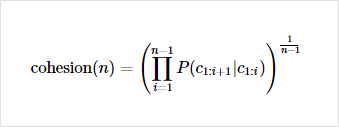    
    
**'반포한강공원에'라는 7의 길이를 가진 문자 시퀀스에 대해서 각 내부 문자열의 스코어를 구하는 과정**   
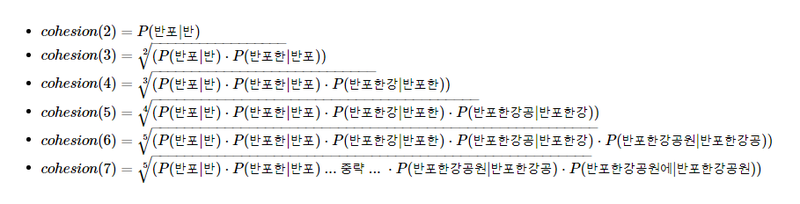

In [12]:
# 응집 확률을 계산해보기
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [13]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [14]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [15]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [16]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

응집 확률이 최대화가 되는 내부 문자열 구간은 '반포한강공원'으로 '반포한강공원'이 하나의 단어일 확률이 높다는것

## soynlp의 브랜칭 엔트로피(branching entropy)
* 브랜칭 엔트로피(Branching Entropy) 는 확률 분포의 엔트로피값을 사용
* 주어진 문자열에서 다음 문자가 등장할 수 있는 가능성을 판단하는 척도
* 랜칭 엔트로피를 주어진 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도라고 비유해 보면
* 브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 정확히 예측할 수 있게 되므로 점차 줄어든다.

In [17]:
# 실습해보기
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [18]:
word_score_table["디스플"].right_branching_entropy

-0.0

'디스' 다음에는 다양한 문자가 올 수 있으니까 1.63이라는 값을 가진다.    
'디스플'이라는 문자열 다음에는 다음 문자로 '레'가 오는 것이 너무나 명백하기 때문에 0이란 값을 가진다.

In [19]:
word_score_table["디스플레"].right_branching_entropy

-0.0

* '디스플레' 다음도 마찬가지겠죠. 다음 문자가 '이'라는 사실이 너무나 명백해서 0이란 값을 가진다.

In [20]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

* 문자 시퀀스 '디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어가 나올 수 있는 다양한 경우가 있을 수 있기 때문에 갑자기 값이 급증함
* 즉 하나의 단어가 끝나면 그 경계 부분부터 다시 브랜칭 엔트로피값이 증가함을 의미
* soynlp 패키지는 이렇게 계산한 점수를 사용해 두 가지 문자열 토큰화 방법을 제공

## soynlp의 LTokenizer
* 띄어쓰기 단위로 잘 나뉜 문장은 L 토크나이저(LTokenizer)를 사용하면 좋다.
* 한국어는 띄어쓰기 단위로 나눈 어절 토큰이 주로 L 토큰 + R 토큰의 형식을 가질 때가 많다.
* 공원에'는 '공원 + 에', '공부하는'은 '공부 + 하는'
* L 토크나이저는 L 토큰 + R 토큰으로 나누되, 점수가 가장 높은 L 토큰을 찾아내는 분리 기준

In [21]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

## 최대 점수 토크나이저
* 최대 점수 토크나이저(MaxScoreTokenizer)는 띄어쓰기가 되어 있지 않은 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저
* 띄어쓰기가 되어 있지 않은 문장을 넣어서 토큰화된 결과를 점수를 통해 알아보기

In [22]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

# 학습정리
soynlp는 한국어 자연어 처리를 위한 라이브러리    
자주 등장하는 신조어나 오탈자, 형태소 분석에서 발생하는 OOV(Out-of-Vocabulary) 문제를 처리하는 데 강점을 가지고 있다.    
데이터에서 단어 빈도수를 기반으로 단어들을 자동으로 추출하며, 이를 활용해 형태소 분석을 수행